In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/weather_data.csv")

In [ ]:
df.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain


In [ ]:
df.shape

(9, 4)

In [ ]:
df.set_index('day',inplace=True)
print(df)

           temperature  windspeed   event
day                                      
1/1/2017          32.0        6.0    Rain
1/4/2017           NaN        9.0   Sunny
1/5/2017          28.0        NaN    Snow
1/6/2017           NaN        7.0     NaN
1/7/2017          32.0        NaN    Rain
1/8/2017           NaN        NaN   Sunny
1/9/2017           NaN        NaN     NaN
1/10/2017         34.0        8.0  Cloudy
1/11/2017         40.0       12.0   Sunny


In [ ]:
new_df=df.fillna(0)

In [ ]:
df.isnull().sum()

temperature    4
windspeed      4
event          2
dtype: int64

In [ ]:
new_df=df.fillna(0)
print(new_df)

           temperature  windspeed   event
day                                      
1/1/2017          32.0        6.0    Rain
1/4/2017           0.0        9.0   Sunny
1/5/2017          28.0        0.0    Snow
1/6/2017           0.0        7.0       0
1/7/2017          32.0        0.0    Rain
1/8/2017           0.0        0.0   Sunny
1/9/2017           0.0        0.0       0
1/10/2017         34.0        8.0  Cloudy
1/11/2017         40.0       12.0   Sunny


In [ ]:
new_df['windspeed'].fillna(0)=True
new_df

In [ ]:
new_df=df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'No Event'
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,No Event
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,No Event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [ ]:
new_df=df.fillna(method="ffill")
print(new_df)

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017         32.0        9.0   Sunny
2   1/5/2017         28.0        9.0    Snow
3   1/6/2017         28.0        7.0    Snow
4   1/7/2017         32.0        7.0    Rain
5   1/8/2017         32.0        7.0   Sunny
6   1/9/2017         32.0        7.0   Sunny
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


In [ ]:
new_df=df.fillna(method="bfill")
print(new_df)

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017         28.0        9.0   Sunny
2   1/5/2017         28.0        7.0    Snow
3   1/6/2017         32.0        7.0    Rain
4   1/7/2017         32.0        8.0    Rain
5   1/8/2017         34.0        8.0   Sunny
6   1/9/2017         34.0        8.0  Cloudy
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


In [ ]:
new_df=df.fillna({
    'temperature':df['temperature'].mean(),
    'windspeed':df['windspeed'].median(),
    'event':'No Event'
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,33.2,9.0,Sunny
2,1/5/2017,28.0,8.0,Snow
3,1/6/2017,33.2,7.0,No Event
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,33.2,8.0,Sunny
6,1/9/2017,33.2,8.0,No Event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [ ]:
new_df=df.fillna(method="ffill",limit(=1))
new_df

SyntaxError: ignored

In [ ]:
df_new=df.interpolate()
df_new

,temperature,windspeed,event
day,,,
1/1/2017,32.000000,6.00,Rain
1/4/2017,30.000000,9.00,Sunny
1/5/2017,28.000000,8.00,Snow
1/6/2017,30.000000,7.00,NaN
1/7/2017,32.000000,7.25,Rain
1/8/2017,32.666667,7.50,Sunny
1/9/2017,33.333333,7.75,NaN
1/10/2017,34.000000,8.00,Cloudy
1/11/2017,40.000000,12.00,Sunny


In [ ]:
df_new=df.dropna()
df_new

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [ ]:
df_new=df.dropna(how='all')
df_new

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


WEATHER 2

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_weather=pd.read_csv("/content/drive/MyDrive/weather_data (1).csv")

Billionaires listed in Forbes

In [ ]:
df_billionaires=pd.read_csv("/content/drive/MyDrive/raptor/forbes_2640_billionaires.csv")

In [ ]:
df_billionaires.head()

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [ ]:
df_billionaires.shape

(2640, 23)

In [ ]:
df_billionaires.isnull().sum()

rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Age                     85
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_billionaires['country'].value_counts()

United States           735
China                   494
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Eswatini (Swaziland)      1
Venezuela                 1
Algeria                   1
Panama                    1
Name: country, Length: 77, dtype: int64

In [ ]:
from pandas.core.algorithms import value_counts
count=df_billionaires['country'].value_counts()

In [ ]:
counts=df_billionaires['country'].value_counts()
counts

United States           735
China                   494
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Eswatini (Swaziland)      1
Venezuela                 1
Algeria                   1
Panama                    1
Name: country, Length: 77, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

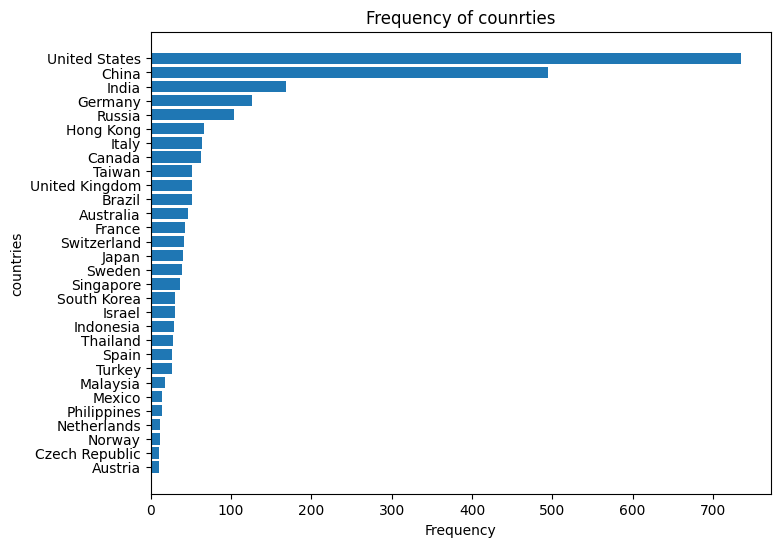

In [ ]:
counts=counts[:30]
counts=counts[::-1]
plt.figure(figsize=(8,6))

plt.barh(counts.index,counts.values)

plt.xlabel('Frequency')
plt.ylabel('countries')
plt.title('Frequency of counrties')
plt.show

Shopping trend

In [ ]:
df_trend=pd.read_csv("/content/drive/MyDrive/raptor/shopping_trends.csv")

In [ ]:
df_trend.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df_trend.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
df_trend.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [ ]:
df_trend.shape

(3900, 19)

In [ ]:
df_trend.describe

<bound method NDFrame.describe of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2          

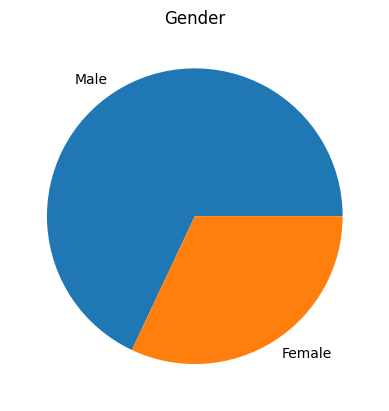

In [ ]:
plt.pie(df_trend['Gender'].value_counts(),labels=df_trend['Gender'].unique())
plt.title('Gender')
plt.show()

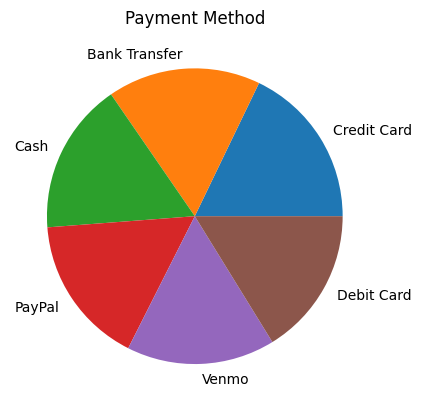

In [ ]:
plt.pie(df_trend['Payment Method'].value_counts(),labels=df_trend['Payment Method'].unique())
plt.title('Payment Method')
plt.show()

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Location')

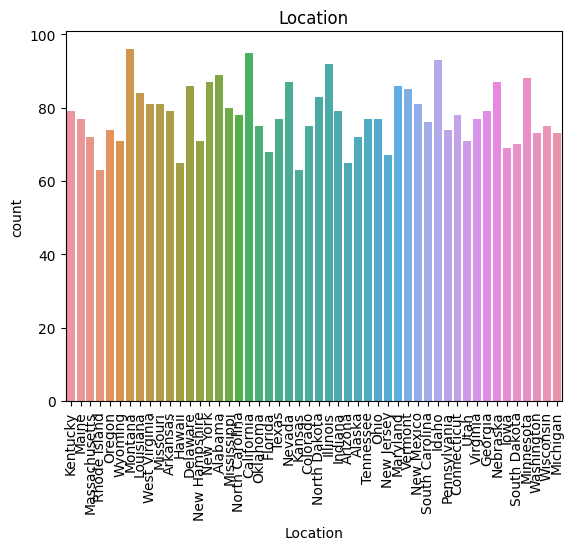

In [ ]:
sns.countplot(x='Location',data=df_trend)
plt.xticks(rotation=90)
plt.title("Location")